In [134]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import dask.dataframe as dd
import seaborn as sns
import numpy as np

In [135]:
df = pd.read_csv('blockchair_bitcoin_inputs_20210313.tsv.gz', compression='gzip', sep='\t')

In [136]:
df2 = pd.read_csv('blockchair_bitcoin_outputs_20210313.tsv.gz', compression='gzip', sep='\t')

In [206]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747646 entries, 0 to 747645
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   block_id                   747646 non-null  int64  
 1   transaction_hash           747646 non-null  object 
 2   index                      747646 non-null  int64  
 3   time                       747646 non-null  object 
 4   value                      747646 non-null  int64  
 5   value_usd                  747646 non-null  float64
 6   recipient                  747646 non-null  object 
 7   type                       747646 non-null  object 
 8   script_hex                 747646 non-null  object 
 9   is_from_coinbase           747646 non-null  int64  
 10  is_spendable               747646 non-null  int64  
 11  spending_block_id          747646 non-null  int64  
 12  spending_transaction_hash  747646 non-null  object 
 13  spending_index             74

In [137]:
df3 = pd.read_csv('blockchair_bitcoin_inputs_20210418.tsv.gz', compression='gzip', sep='\t')
df4 = pd.read_csv('blockchair_bitcoin_outputs_20210418.tsv.gz', compression='gzip', sep='\t')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885267 entries, 0 to 885266
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   block_id                   885267 non-null  int64  
 1   transaction_hash           885267 non-null  object 
 2   index                      885267 non-null  int64  
 3   time                       885267 non-null  object 
 4   value                      885267 non-null  int64  
 5   value_usd                  885267 non-null  float64
 6   recipient                  885267 non-null  object 
 7   type                       885267 non-null  object 
 8   script_hex                 885267 non-null  object 
 9   is_from_coinbase           885267 non-null  int64  
 10  is_spendable               885267 non-null  int64  
 11  spending_block_id          885267 non-null  int64  
 12  spending_transaction_hash  885267 non-null  object 
 13  spending_index             88

In [139]:
df2.head(5)

,block_id,transaction_hash,index,time,value,value_usd,recipient,type,script_hex,is_from_coinbase,is_spendable
0,674354,211dfdebf598d15eb8b188664d963920991f7df8168bc0...,0,2021-03-13 00:09:18,731741124,418307.1250,1CK6KHY6MHgYvmRQ4PAafKYDrg1ejbH1cE,pubkeyhash,76a9147c154ed1dc59609e3d26abb2df2ea3d587cd8c41...,1,-1
1,674354,211dfdebf598d15eb8b188664d963920991f7df8168bc0...,1,2021-03-13 00:09:18,0,0.0000,d-d4ee8394becc9296404ca86a8cb4284f,nulldata,6a4c2952534b424c4f434b3a1145118858629f0ae3466d...,1,0
2,674354,211dfdebf598d15eb8b188664d963920991f7df8168bc0...,2,2021-03-13 00:09:18,0,0.0000,d-f0c8647d9dc0f4ba895f259ba5d76350,nulldata,6a4c266a24b9e11b6dab79463cfeccbf5ca2e980885d50...,1,0
3,674354,211dfdebf598d15eb8b188664d963920991f7df8168bc0...,3,2021-03-13 00:09:18,0,0.0000,d-4258d4902e60bc88a3755101dbe621ed,nulldata,6a24aa21a9ed8cb9b88ad2036f87ca87ca8c3055fb13c0...,1,0
4,674354,4ba5747cad78e48f1c4634888c771eb97233a3b6ac8b9a...,0,2021-03-13 00:09:18,497517,284.4106,3E6HKvbEhvqTACkMBgBijXVDEwErrJc9W2,scripthash,a9148807ef3523bee90d3d88ba927a5dcf64557f7e7687,0,-1


In [148]:
#rip
df_m = df[df['value_usd'] >= 1e6].reset_index(drop=True)
d_m = df_m.merge(df2, on = 'transaction_hash', how = 'inner')

In [203]:
d_m.to_csv('rip.csv', index=False)

In [149]:
#dip
df1_m = df3[df3['value_usd'] > 1e6].reset_index(drop=True)
d1_m = df1_m.merge(df4, on = 'transaction_hash', how = 'inner')

In [208]:
d1_m.head()

,block_id_x,transaction_hash,index_x,time_x,value_x,value_usd_x,recipient_x,type_x,script_hex_x,is_from_coinbase_x,...,block_id_y,index_y,time_y,value_y,value_usd_y,recipient_y,type_y,script_hex_y,is_from_coinbase_y,is_spendable_y
0,679617,5debd7cd6baf59dcf7879810c40a4a29ce55e6840048d5...,0,2021-04-18 00:02:49,1264564987917,759952960.0,19iqYbeATe4RxghQZJnYVFU4mjUUu76EA6,pubkeyhash,76a9145faa9576e45acbc9662b6abf323229b748a9495d...,0,...,679617,0,2021-04-18 00:02:49,1264564987917,7.599530e+08,19iqYbeATe4RxghQZJnYVFU4mjUUu76EA6,pubkeyhash,76a9145faa9576e45acbc9662b6abf323229b748a9495d...,0,-1
1,679617,dc6df102e00e195e0c0daf066c3f41a81c9b6f7cfc66f1...,25,2021-04-18 00:02:49,10871612822,6533404.5,bc1qwrxvwmjgd4au9d82usts5qm9q00acjgdxmlfn356jd...,witness_v0_keyhash,002070ccc76e486d7bc2b4eae4170a036503dfdc490d36...,0,...,679617,0,2021-04-18 00:02:49,189000,1.135814e+02,1CcttA2oxCoEMXPcu1gM3JavhWLTM4JiwK,pubkeyhash,76a9147f73404e284c4f28724d0f3c67aa9af3f473e369...,0,-1
2,679617,dc6df102e00e195e0c0daf066c3f41a81c9b6f7cfc66f1...,25,2021-04-18 00:02:49,10871612822,6533404.5,bc1qwrxvwmjgd4au9d82usts5qm9q00acjgdxmlfn356jd...,witness_v0_keyhash,002070ccc76e486d7bc2b4eae4170a036503dfdc490d36...,0,...,679617,1,2021-04-18 00:02:49,5376000,3.230761e+03,3BQzrg8FseWzke2Uzs2y3nbiGccUz3VEsd,scripthash,a9146aa9b646b17bcc7d75d68b3d05158b5e8a34e11487,0,-1
3,679617,dc6df102e00e195e0c0daf066c3f41a81c9b6f7cfc66f1...,25,2021-04-18 00:02:49,10871612822,6533404.5,bc1qwrxvwmjgd4au9d82usts5qm9q00acjgdxmlfn356jd...,witness_v0_keyhash,002070ccc76e486d7bc2b4eae4170a036503dfdc490d36...,0,...,679617,2,2021-04-18 00:02:49,13055000,7.845533e+03,3KnpZHMR8Ybx4msnHZkHxVN2uwufVt4YqA,scripthash,a914c68b4583f41de332e8b9b8cda1ab040b6673372487,0,-1
4,679617,dc6df102e00e195e0c0daf066c3f41a81c9b6f7cfc66f1...,25,2021-04-18 00:02:49,10871612822,6533404.5,bc1qwrxvwmjgd4au9d82usts5qm9q00acjgdxmlfn356jd...,witness_v0_keyhash,002070ccc76e486d7bc2b4eae4170a036503dfdc490d36...,0,...,679617,3,2021-04-18 00:02:49,14985000,9.005386e+03,1NE8yALaJhfA3RwY9EWZjEGorJjc9ZeZLu,pubkeyhash,76a914e8d6b357ce839d76a261aa1b42c29025fb8397fd...,0,-1


## Exploratory Data Analysis

In [157]:
d_m['time_x'] = pd.to_datetime(d_m['time_x'])
d1_m['time_x'] = pd.to_datetime(d1_m['time_x'])

In [160]:
d1_m.head()

,block_id_x,transaction_hash,index_x,time_x,value_x,value_usd_x,recipient_x,type_x,script_hex_x,is_from_coinbase_x,...,block_id_y,index_y,time_y,value_y,value_usd_y,recipient_y,type_y,script_hex_y,is_from_coinbase_y,is_spendable_y
0,679617,5debd7cd6baf59dcf7879810c40a4a29ce55e6840048d5...,0,2021-04-18 00:02:49,1264564987917,759952960.0,19iqYbeATe4RxghQZJnYVFU4mjUUu76EA6,pubkeyhash,76a9145faa9576e45acbc9662b6abf323229b748a9495d...,0,...,679617,0,2021-04-18 00:02:49,1264564987917,7.599530e+08,19iqYbeATe4RxghQZJnYVFU4mjUUu76EA6,pubkeyhash,76a9145faa9576e45acbc9662b6abf323229b748a9495d...,0,-1
1,679617,dc6df102e00e195e0c0daf066c3f41a81c9b6f7cfc66f1...,25,2021-04-18 00:02:49,10871612822,6533404.5,bc1qwrxvwmjgd4au9d82usts5qm9q00acjgdxmlfn356jd...,witness_v0_keyhash,002070ccc76e486d7bc2b4eae4170a036503dfdc490d36...,0,...,679617,0,2021-04-18 00:02:49,189000,1.135814e+02,1CcttA2oxCoEMXPcu1gM3JavhWLTM4JiwK,pubkeyhash,76a9147f73404e284c4f28724d0f3c67aa9af3f473e369...,0,-1
2,679617,dc6df102e00e195e0c0daf066c3f41a81c9b6f7cfc66f1...,25,2021-04-18 00:02:49,10871612822,6533404.5,bc1qwrxvwmjgd4au9d82usts5qm9q00acjgdxmlfn356jd...,witness_v0_keyhash,002070ccc76e486d7bc2b4eae4170a036503dfdc490d36...,0,...,679617,1,2021-04-18 00:02:49,5376000,3.230761e+03,3BQzrg8FseWzke2Uzs2y3nbiGccUz3VEsd,scripthash,a9146aa9b646b17bcc7d75d68b3d05158b5e8a34e11487,0,-1
3,679617,dc6df102e00e195e0c0daf066c3f41a81c9b6f7cfc66f1...,25,2021-04-18 00:02:49,10871612822,6533404.5,bc1qwrxvwmjgd4au9d82usts5qm9q00acjgdxmlfn356jd...,witness_v0_keyhash,002070ccc76e486d7bc2b4eae4170a036503dfdc490d36...,0,...,679617,2,2021-04-18 00:02:49,13055000,7.845533e+03,3KnpZHMR8Ybx4msnHZkHxVN2uwufVt4YqA,scripthash,a914c68b4583f41de332e8b9b8cda1ab040b6673372487,0,-1
4,679617,dc6df102e00e195e0c0daf066c3f41a81c9b6f7cfc66f1...,25,2021-04-18 00:02:49,10871612822,6533404.5,bc1qwrxvwmjgd4au9d82usts5qm9q00acjgdxmlfn356jd...,witness_v0_keyhash,002070ccc76e486d7bc2b4eae4170a036503dfdc490d36...,0,...,679617,3,2021-04-18 00:02:49,14985000,9.005386e+03,1NE8yALaJhfA3RwY9EWZjEGorJjc9ZeZLu,pubkeyhash,76a914e8d6b357ce839d76a261aa1b42c29025fb8397fd...,0,-1


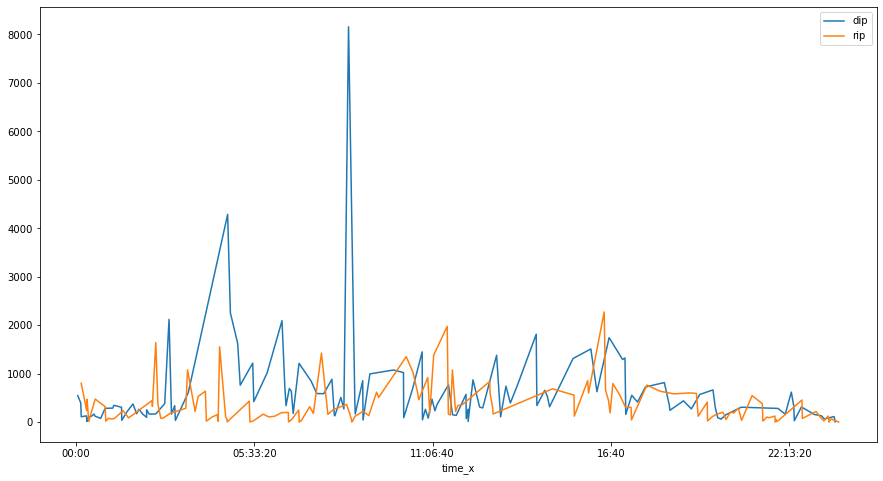

In [173]:
plt.figure(figsize=(15,8))
d1_m.groupby(d1_m.time_x.dt.time)['transaction_hash'].count().plot(label='dip')
d_m.groupby(d_m.time_x.dt.time)['transaction_hash'].count().plot(label='rip')
plt.legend();

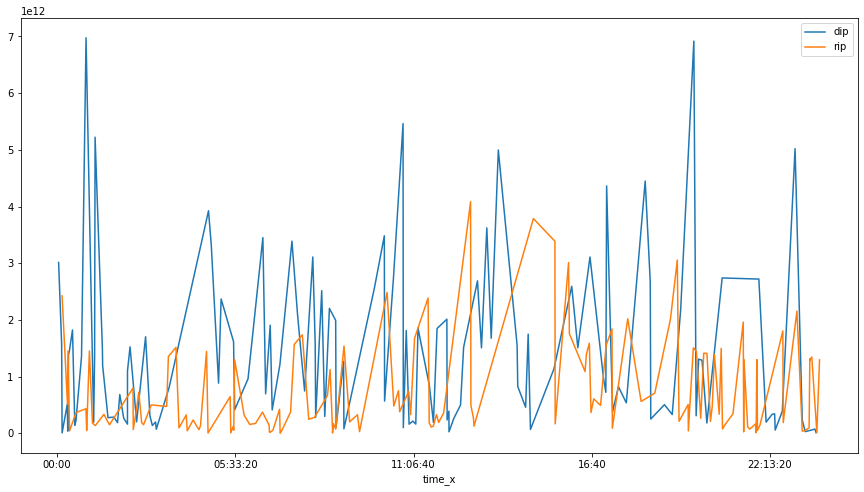

In [190]:
plt.figure(figsize=(15,8))
d1_m.groupby(d1_m.time_x.dt.time)['value_y'].sum().plot(label='dip')
d_m.groupby(d_m.time_x.dt.time)['value_y'].sum().plot(label='rip')
plt.legend();

In [175]:
dx_m = d_m[['recipient_x', 'recipient_y']]
dx1_m = d1_m[['recipient_x', 'recipient_y']]

In [204]:
dx1_m.to_csv('dx1.csv', index=False)

In [196]:
G = nx.Graph()
G = nx.from_pandas_edgelist(dx_m, 'recipient_x', 'recipient_y',
                           create_using=nx.DiGraph())


In [201]:
G2 = nx.Graph()
G2 = nx.from_pandas_edgelist(dx1_m, 'recipient_x', 'recipient_y',
                            create_using=nx.DiGraph())


No handles with labels found to put in legend.


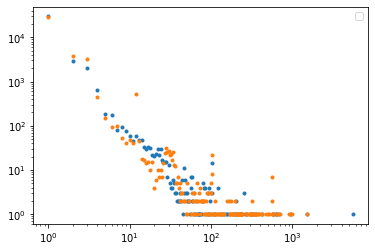

In [199]:
plt.loglog(nx.degree_histogram(G),'.');
plt.loglog(nx.degree_histogram(G2),'.');
plt.legend()

In [202]:
G.edges()

OutEdgeView([('bc1q9yydw59g6v0c7evnjgw5aale7k5y77uugyff8r', '3L7Tg62hhqc6CJuZDUutNfeHegutdVBeEh'), ('bc1q9yydw59g6v0c7evnjgw5aale7k5y77uugyff8r', '385Ar9xDszPDb62yxT6f9piq8aD1vBdjmM'), ('bc1q9yydw59g6v0c7evnjgw5aale7k5y77uugyff8r', '322nSSzjGRbif5Zbz5XvU5b3z8BEjkHzhc'), ('bc1q9yydw59g6v0c7evnjgw5aale7k5y77uugyff8r', '1p781tsBpVpzKuD61jgmyZXNWApjZPxcx'), ('bc1q9yydw59g6v0c7evnjgw5aale7k5y77uugyff8r', '32p18YfpEd47Bu1gNePVitFJyHpzNDWrWq'), ('bc1q9yydw59g6v0c7evnjgw5aale7k5y77uugyff8r', '1CS4tYMUgBRWHnx4ThZoRT1o6cRy61jP39'), ('bc1q9yydw59g6v0c7evnjgw5aale7k5y77uugyff8r', 'bc1q9yydw59g6v0c7evnjgw5aale7k5y77uugyff8r'), ('bc1qpnk0shp4jetalmamxcy6vvmrvhhamswmhprlcx', '1FNXcugV3AUhhEPgqV39KL816WYujQid2m'), ('bc1qpnk0shp4jetalmamxcy6vvmrvhhamswmhprlcx', '3C8XbKFu2obnnuhzPs8pKXVoL331a6ahbk'), ('bc1qpnk0shp4jetalmamxcy6vvmrvhhamswmhprlcx', 'bc1qpnk0shp4jetalmamxcy6vvmrvhhamswmhprlcx'), ('bc1qpnk0shp4jetalmamxcy6vvmrvhhamswmhprlcx', '1JpasUABCWrZqYPQvmnpAtQFN4V4HDnckS'), ('bc1qpnk0shp4jetalmamxcy6

In [19]:
def clust_coef(net):
    cc = nx.clustering(net)
    avg_clust = sum(cc.values()) / len(cc)
    return avg_clust
#     print(f'Average clustering coefficient = {avg_clust}')
def ave_deg(net):
    degrees1 = [k for node, k in nx.degree(net)]
    k_min1 = np.min(degrees1)
    k_max1 = np.max(degrees1)
    k_avg1 = np.mean(degrees1)
    return [k_min1, k_max1, k_avg1]
#     print ('Minimum degree: ', k_min1)
#     print ('Maximum degree: ', k_max1)
#     print ('Average degree: ', k_avg1)

In [20]:
cols = ['Network', 'Min Degree', 'Max Degree', 'Ave. Degree', 'Clustering Coefficient']
df_metrics = pd.DataFrame(columns=cols)

df_metrics.loc[0] = ['Apr13, > 1M', ave_deg(G)[0], ave_deg(G)[1],
                     ave_deg(G)[2], clust_coef(G)]

df_metrics.loc[1] = ['Apr18, > 1M', ave_deg(G2)[0], ave_deg(G2)[1],
                     ave_deg(G2)[2], clust_coef(G2)]

df_metrics

,Network,Min Degree,Max Degree,Ave. Degree,Clustering Coefficient
0,"Apr13, > 1M",1,5479,2.346186,0.077208
1,"Apr18, > 1M",1,1502,2.818969,0.135034


In [23]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)

In [192]:
G0 = G.subgraph(Gcc[1])

print('Giant component is G0 with the following characteristics')
print('Nodes:',len(G0.nodes()))
print('Number of links:', G0.size())

Giant component is G0 with the following characteristics
Nodes: 506
Number of links: 677


In [ ]:
degree = list(nx.degree_centrality(G0).values())
closeness = list(nx.closeness_centrality(G0).values())
betweenness = list(nx.betweenness_centrality(G0, normalized=True).values())
eigenvector = list(nx.eigenvector_centrality(G0).values())

In [80]:
df = pd.DataFrame(list(nx.degree_centrality(G0).keys()), columns=['node'])

In [81]:
df['degree'] = list(nx.degree_centrality(G0).values())
df['closeness'] = list(nx.closeness_centrality(G0).values())
df['betweenness'] = list(nx.betweenness_centrality(G0).values())
df['eigenvector'] = list(nx.eigenvector_centrality(G0).values())

In [126]:
# plt.figure(figsize=(10,8))
# pos = nx.spring_layout(G0, k=0.2)
# nc = nx.draw(G0, pos=pos, node_size = 100, 
#              cmap=plt.cm.RdYlBu);
# # nx.draw_networkx_labels(G0, pos, font_color='black', font_size=9);
# nx.draw_networkx_edges(G0, pos=pos, alpha=0.500);
# plt.title('Social Network of Giant Component');

# ax = plt.gca()
# ax.collections[0].set_edgecolor("black")

In [67]:
centralities = [degree, closeness, betweenness, eigenvector]

In [194]:
fig = plt.figure(figsize=(20,15));

# titles = ['Degree Centrality', 'Closeness Centrality', 
#           'Betweenness Centrality', 'Eigenvector Centrality']

pos = nx.spring_layout(G0, k=0.18)

# for i in range(4):
# ax = fig.add_subplot(2, 2, i+1);
nc = nx.draw_networkx_nodes(G0, pos, 
                        node_size=100, cmap=plt.cm.RdYlBu_r,
                        node_color=betweenness, arrows=True);
nx.draw_networkx_edges(G0, pos, alpha=0.500);
# plt.title(titles[i]);
plt.axis('off');
plt.colorbar(nc);

ax = plt.gca()
ax.collections[0].set_edgecolor("black")

plt.show()
print('Fig.10 - Centrality Measures for `G`')

TypeError: draw_networkx_nodes() got an unexpected keyword argument 'arrows'

<Figure size 1440x1080 with 0 Axes>

In [113]:
df.sort_values(by='betweenness', ascending=False)[:1].node.values

array(['bc1qp7ljpqsxyg6729q8kn3hx802nq0anjf2mfujegfqazwp9z63elms5rzzm9'],
      dtype=object)